## Ranking Social Media News Feed Posts
#### Author: Ilgiz Nurlanov

In [1]:
import pandas as pd
df= pd.read_csv('all_data.csv')
df.head()

,Keywords_relevance,Hashtags_relevance,Mentions_relevance,Interaction_rate,Mention_count,Followers_Followings,Seniority,Listed_count,Length,Hashtags,URL,Multimedia,Popularity,Relevance
0,0.0,0.0,0.0,0.0,0.0,3.0,8.0,300.0,85.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,2.0,5.0,195.0,70.0,0.0,1.0,0.0,6.0,1.0
2,0.0,1.0,0.0,1.0,1.0,2.0,5.0,195.0,79.0,1.0,0.0,1.0,287.0,0.0
3,0.0,0.0,0.0,0.0,0.0,484.0,8.0,4632.0,120.0,0.0,1.0,0.0,33.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,4.0,28.0,106.0,0.0,0.0,1.0,4.0,1.0


### EDA

In [2]:
df.columns

Index(['Keywords_relevance', 'Hashtags_relevance', 'Mentions_relevance',
       'Interaction_rate', 'Mention_count', 'Followers_Followings',
       'Seniority', 'Listed_count', 'Length', 'Hashtags', 'URL', 'Multimedia',
       'Popularity', 'Relevance'],
      dtype='object')

In [3]:
missing_values = df.isnull().sum()

missing_values

Keywords_relevance      0
Hashtags_relevance      0
Mentions_relevance      0
Interaction_rate        0
Mention_count           0
Followers_Followings    0
Seniority               0
Listed_count            0
Length                  0
Hashtags                0
URL                     0
Multimedia              0
Popularity              0
Relevance               0
dtype: int64

In [4]:
df.shape

(26180, 14)

In [5]:
df.dtypes

Keywords_relevance      float64
Hashtags_relevance      float64
Mentions_relevance      float64
Interaction_rate        float64
Mention_count           float64
Followers_Followings    float64
Seniority               float64
Listed_count            float64
Length                  float64
Hashtags                float64
URL                     float64
Multimedia              float64
Popularity              float64
Relevance               float64
dtype: object

In [6]:
df.describe()

,Keywords_relevance,Hashtags_relevance,Mentions_relevance,Interaction_rate,Mention_count,Followers_Followings,Seniority,Listed_count,Length,Hashtags,URL,Multimedia,Popularity,Relevance
count,26180.000000,26180.000000,26180.000000,26180.000000,26180.000000,2.618000e+04,26180.000000,26180.000000,26180.000000,26180.000000,26180.000000,26180.000000,2.618000e+04,26180.000000
mean,7.148739,2.816501,0.039267,0.326322,0.827235,5.943866e+04,6.271352,4953.311917,108.720435,0.284416,0.674408,0.130634,2.129949e+03,0.361154
std,24.068315,18.099422,0.194232,0.321463,3.834577,7.760092e+05,2.487298,17154.201105,32.072396,0.451144,0.468605,0.337006,3.274410e+04,0.480344
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000e+00,4.000000,138.000000,88.000000,0.000000,0.000000,0.000000,4.000000e+00,0.000000
50%,0.000000,0.000000,0.000000,0.250000,0.000000,2.100000e+01,7.000000,416.000000,121.000000,0.000000,1.000000,0.000000,1.700000e+01,0.000000
75%,3.000000,0.000000,0.000000,0.600000,0.000000,3.050000e+02,8.000000,2006.000000,136.000000,1.000000,1.000000,0.000000,1.070000e+02,1.000000
max,412.000000,397.000000,1.000000,1.000000,108.000000,1.608911e+07,11.000000,228104.000000,140.000000,1.000000,1.000000,1.000000,2.721653e+06,1.000000


### Features' Visualization

(array([0, 1]), [Text(0, 0, '0.0'), Text(1, 0, '1.0')])

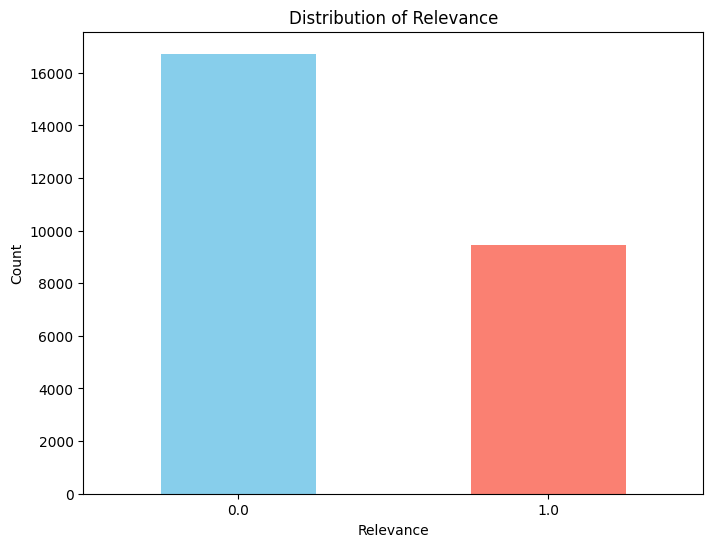

In [7]:
import matplotlib.pyplot as plt
# distribution of the target variable
plt.figure(figsize=(8, 6))
df['Relevance'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Relevance')
plt.xlabel('Relevance')
plt.ylabel('Count')
plt.xticks(rotation=0)


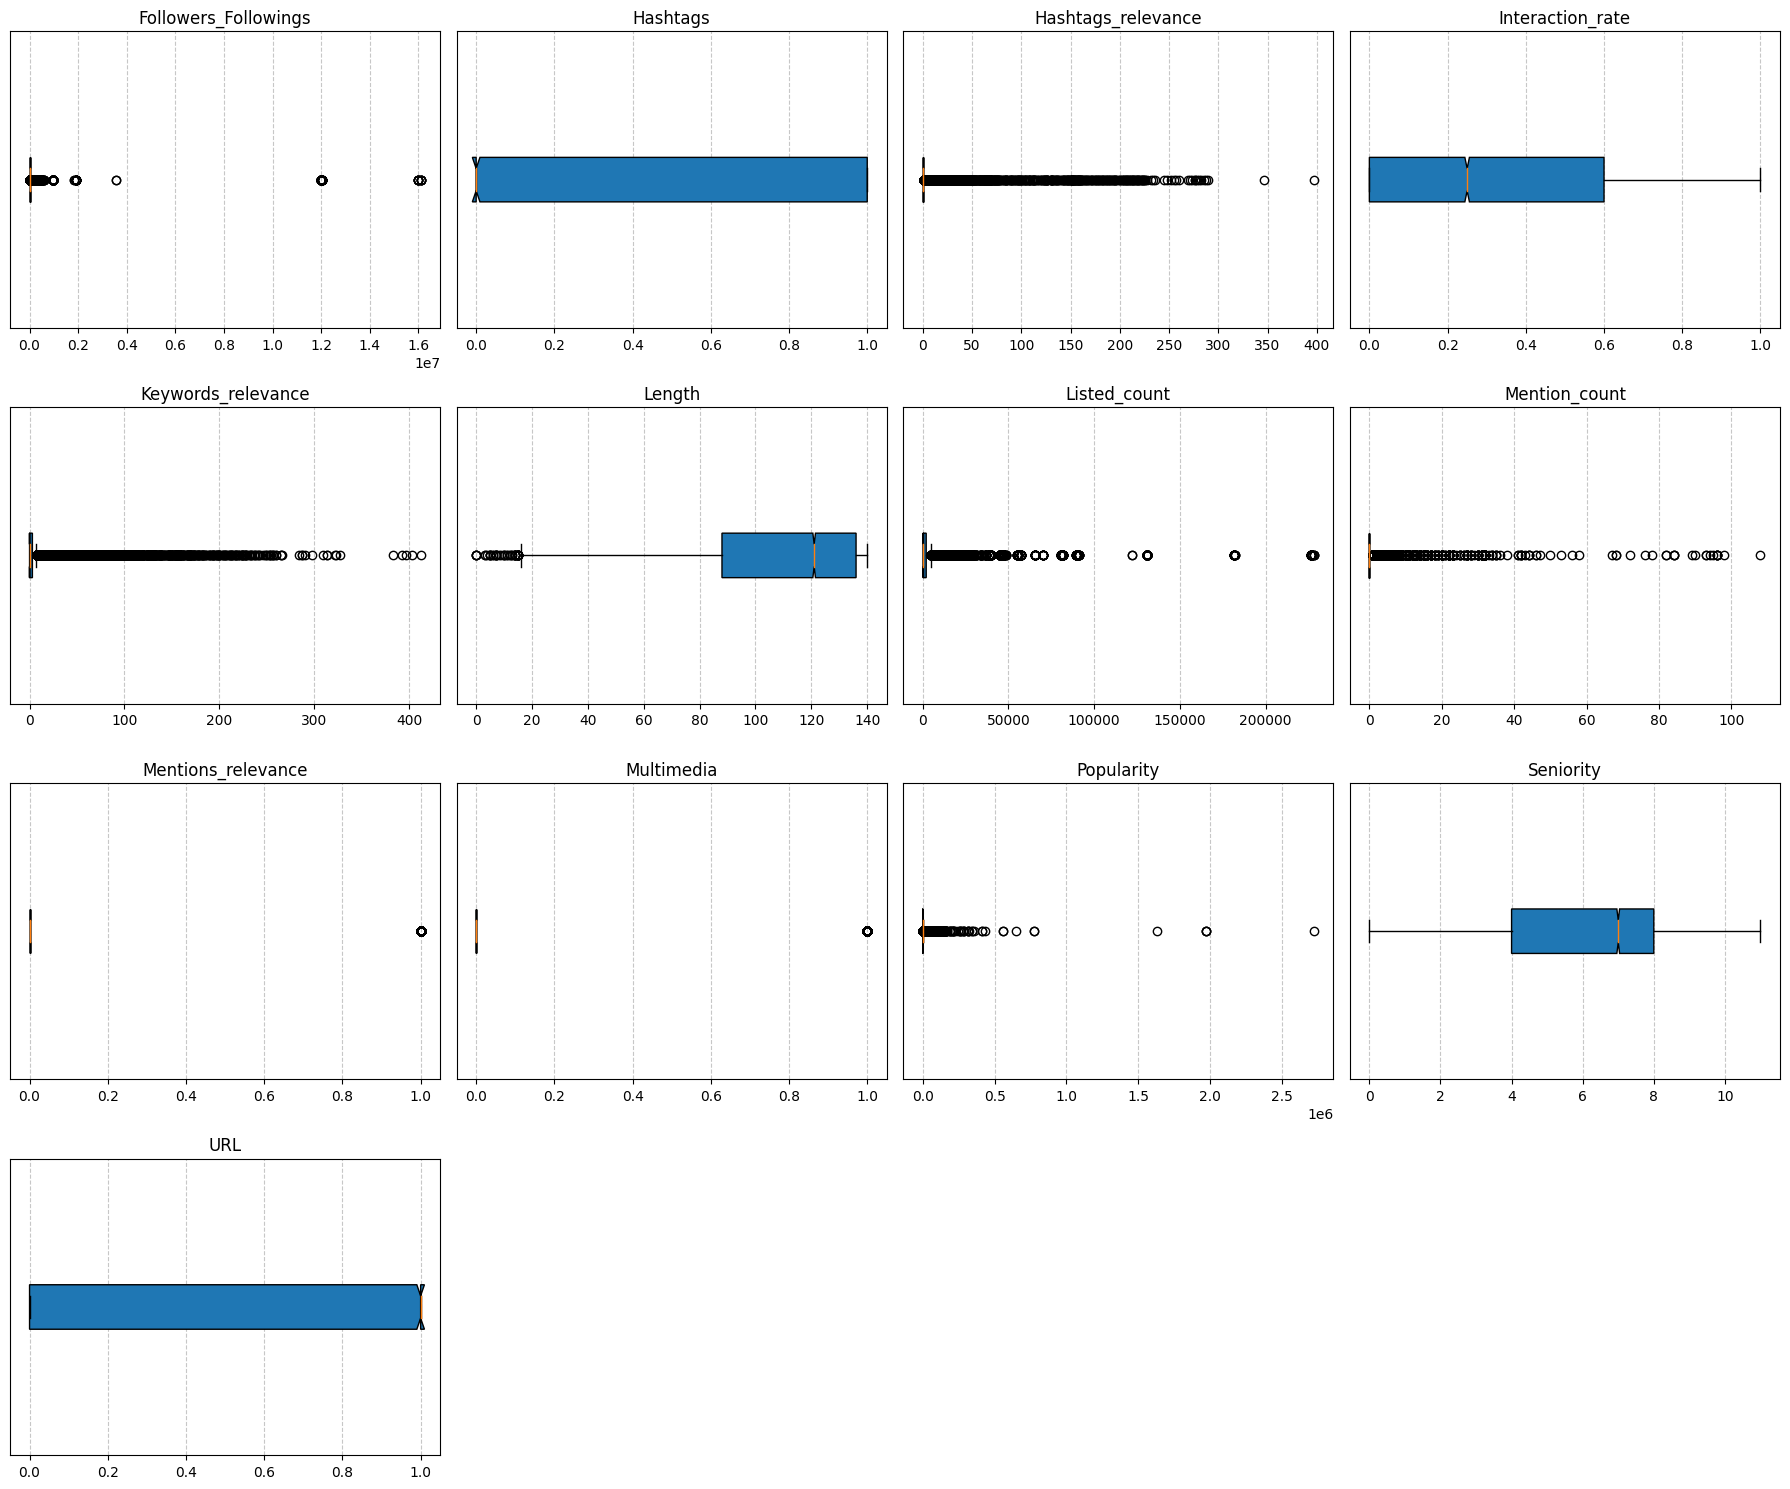

In [8]:
features = df.columns.difference(['Relevance'])

# boxplots
plt.figure(figsize=(18, 15))
for i, feature in enumerate(features, 1):
    plt.subplot(4, 4, i)
    plt.boxplot(df[feature], vert=False, patch_artist=True, notch=True)
    plt.title(f'{feature}')
    plt.yticks([])
    plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

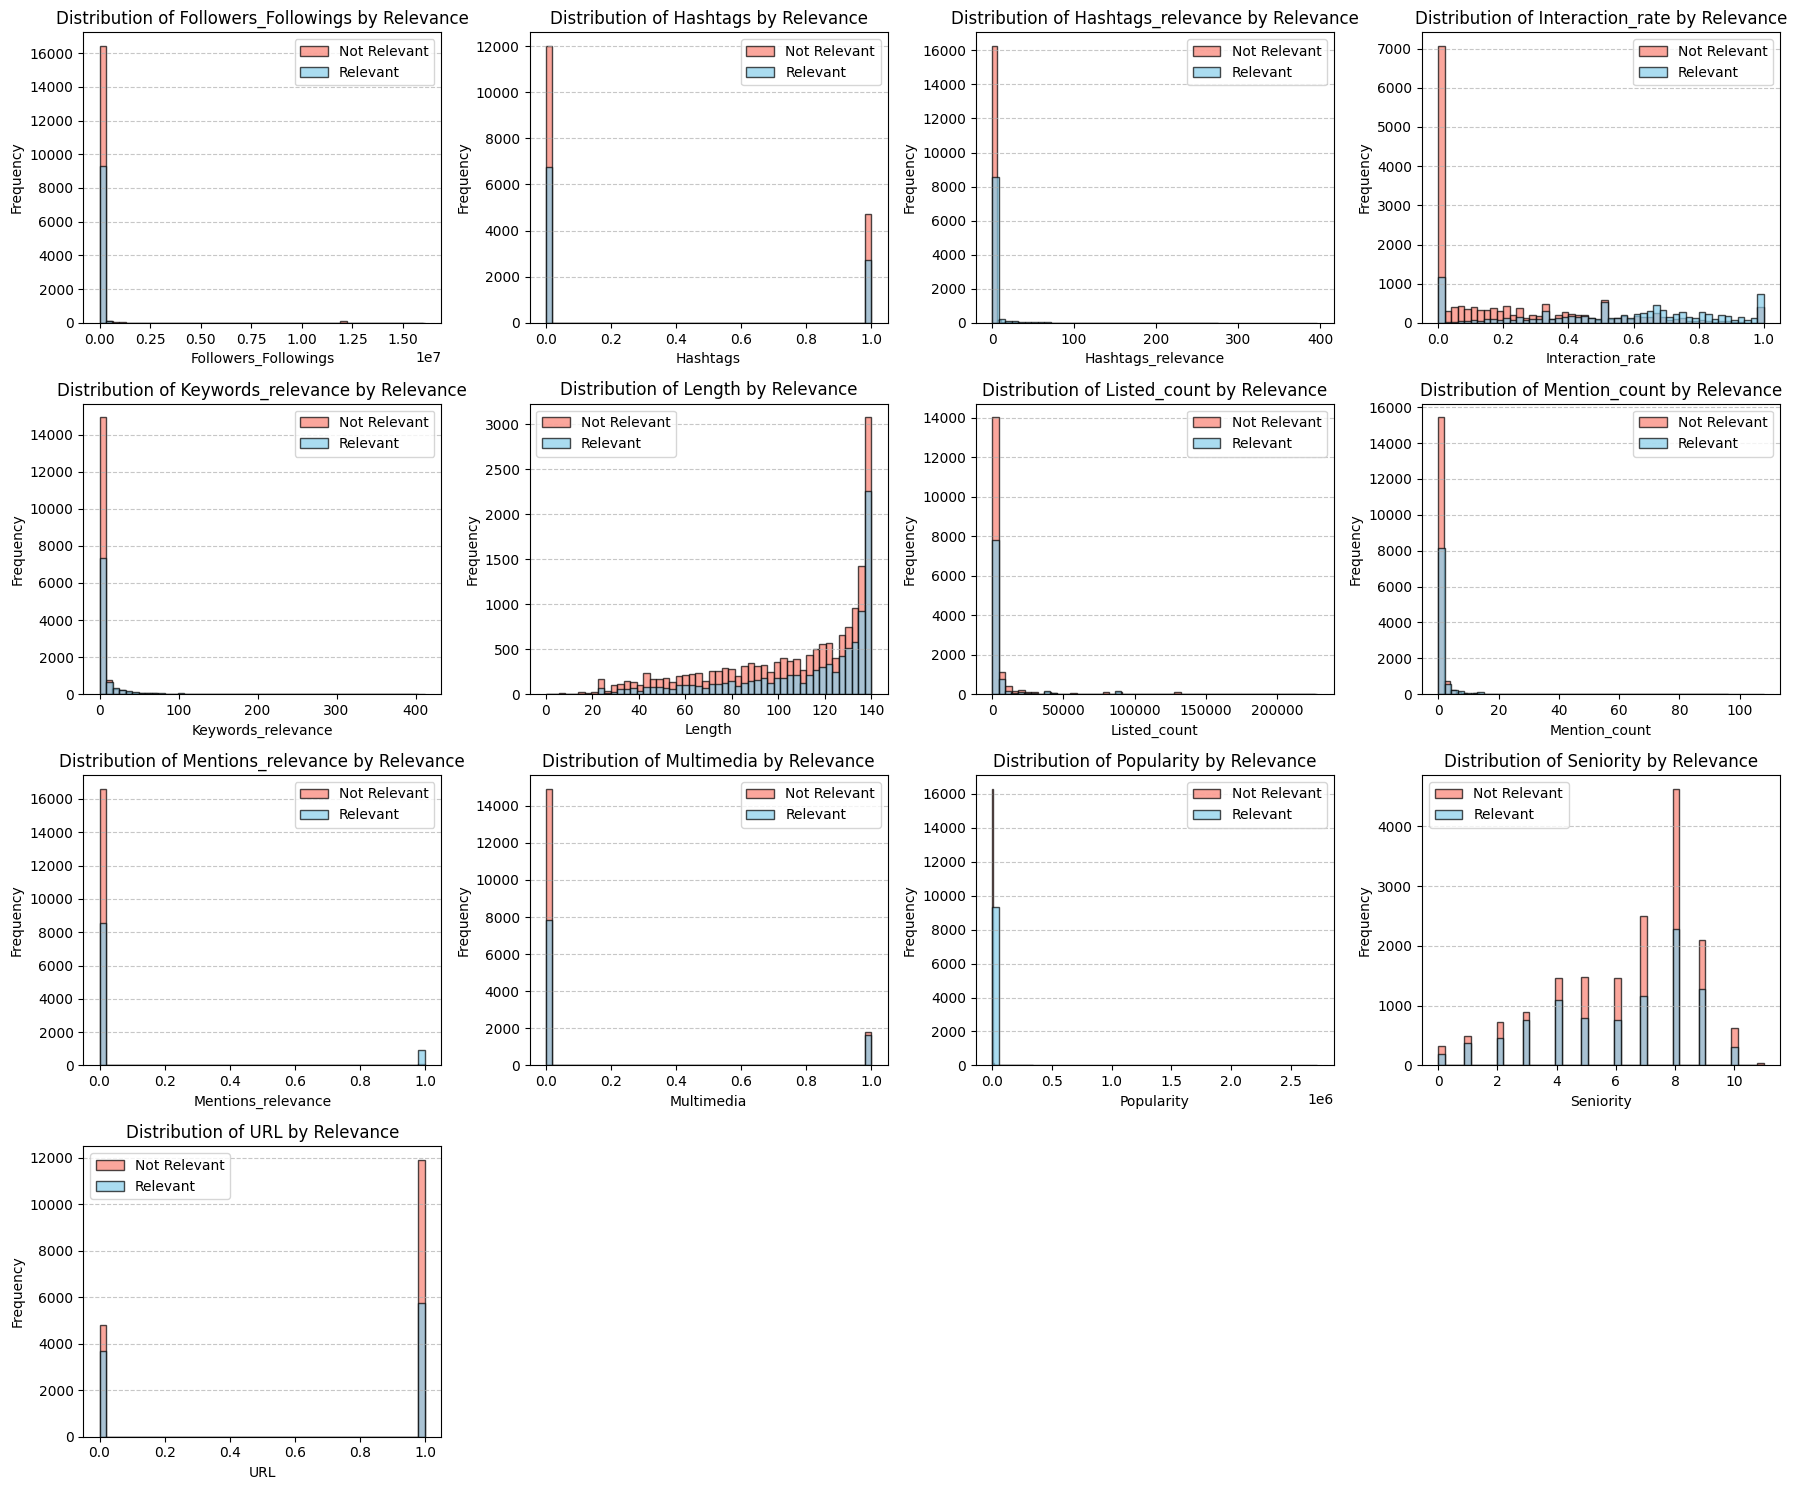

In [9]:
plt.figure(figsize=(18, 15))
for i, feature in enumerate(features, 1):
    plt.subplot(4, 4, i)
    
    plt.hist(df[df['Relevance'] == 0][feature], bins=50, color='salmon', edgecolor='black', alpha=0.7, label='Not Relevant')
    
    plt.hist(df[df['Relevance'] == 1][feature], bins=50, color='skyblue', edgecolor='black', alpha=0.7, label='Relevant')
    
    plt.title(f'Distribution of {feature} by Relevance')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

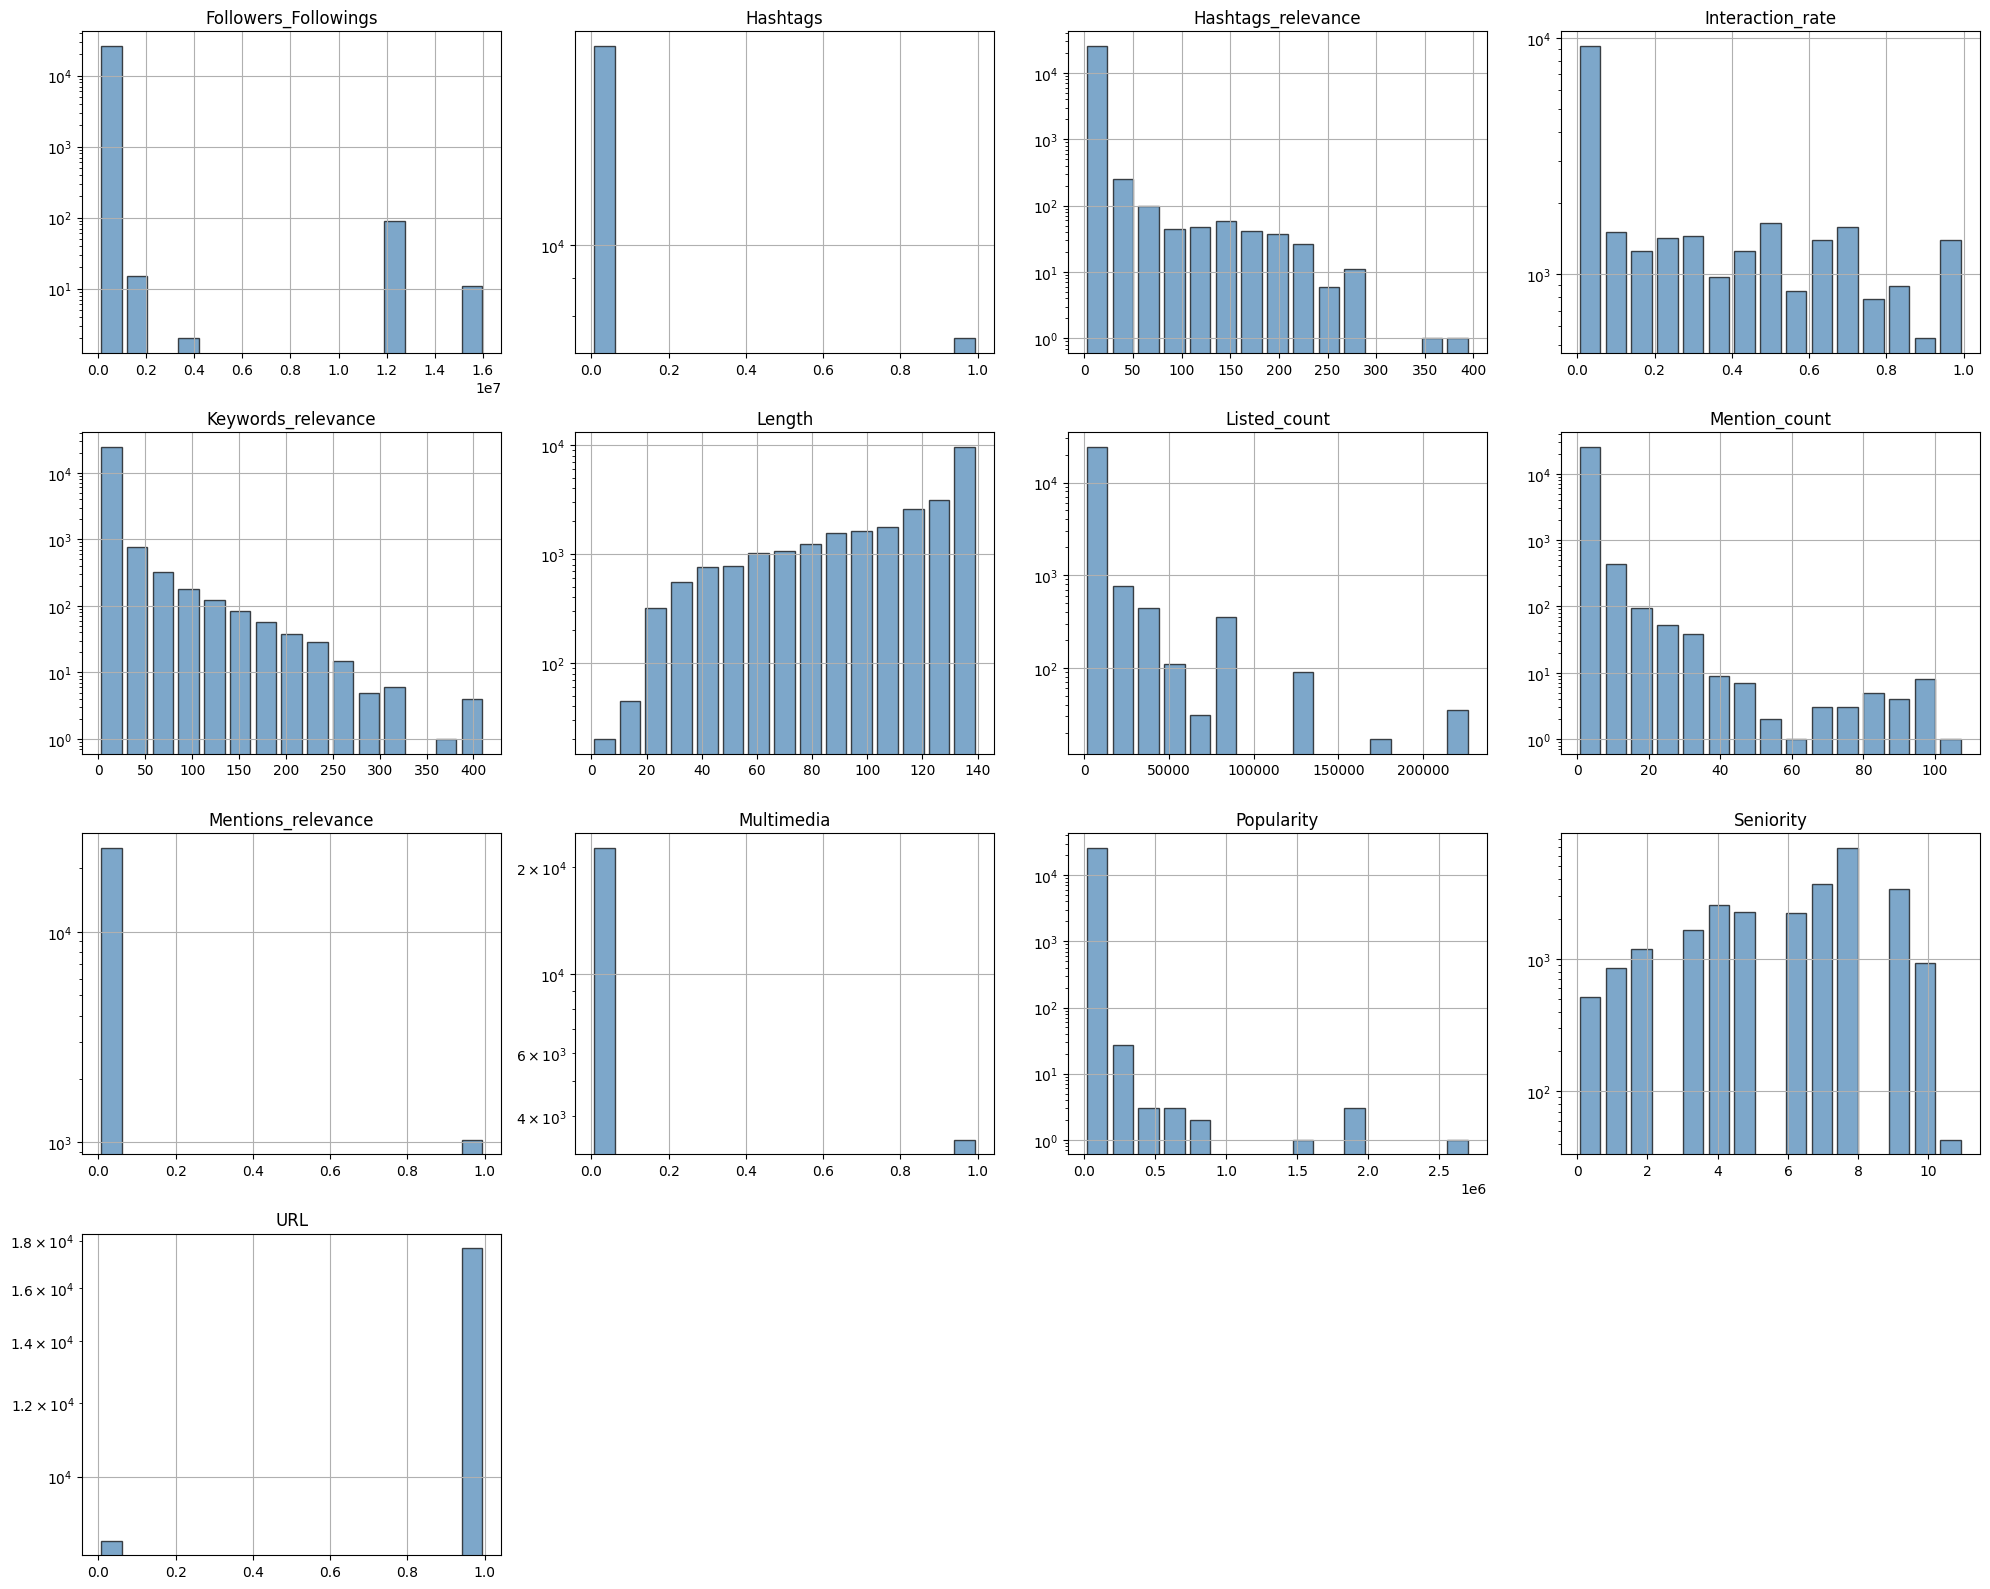

In [10]:
df[features].hist(bins=15, figsize=(20, 16), sharex=False, log=True, rwidth=0.8, color='steelblue', edgecolor='black', alpha=0.7)
plt.tight_layout()
plt.show()

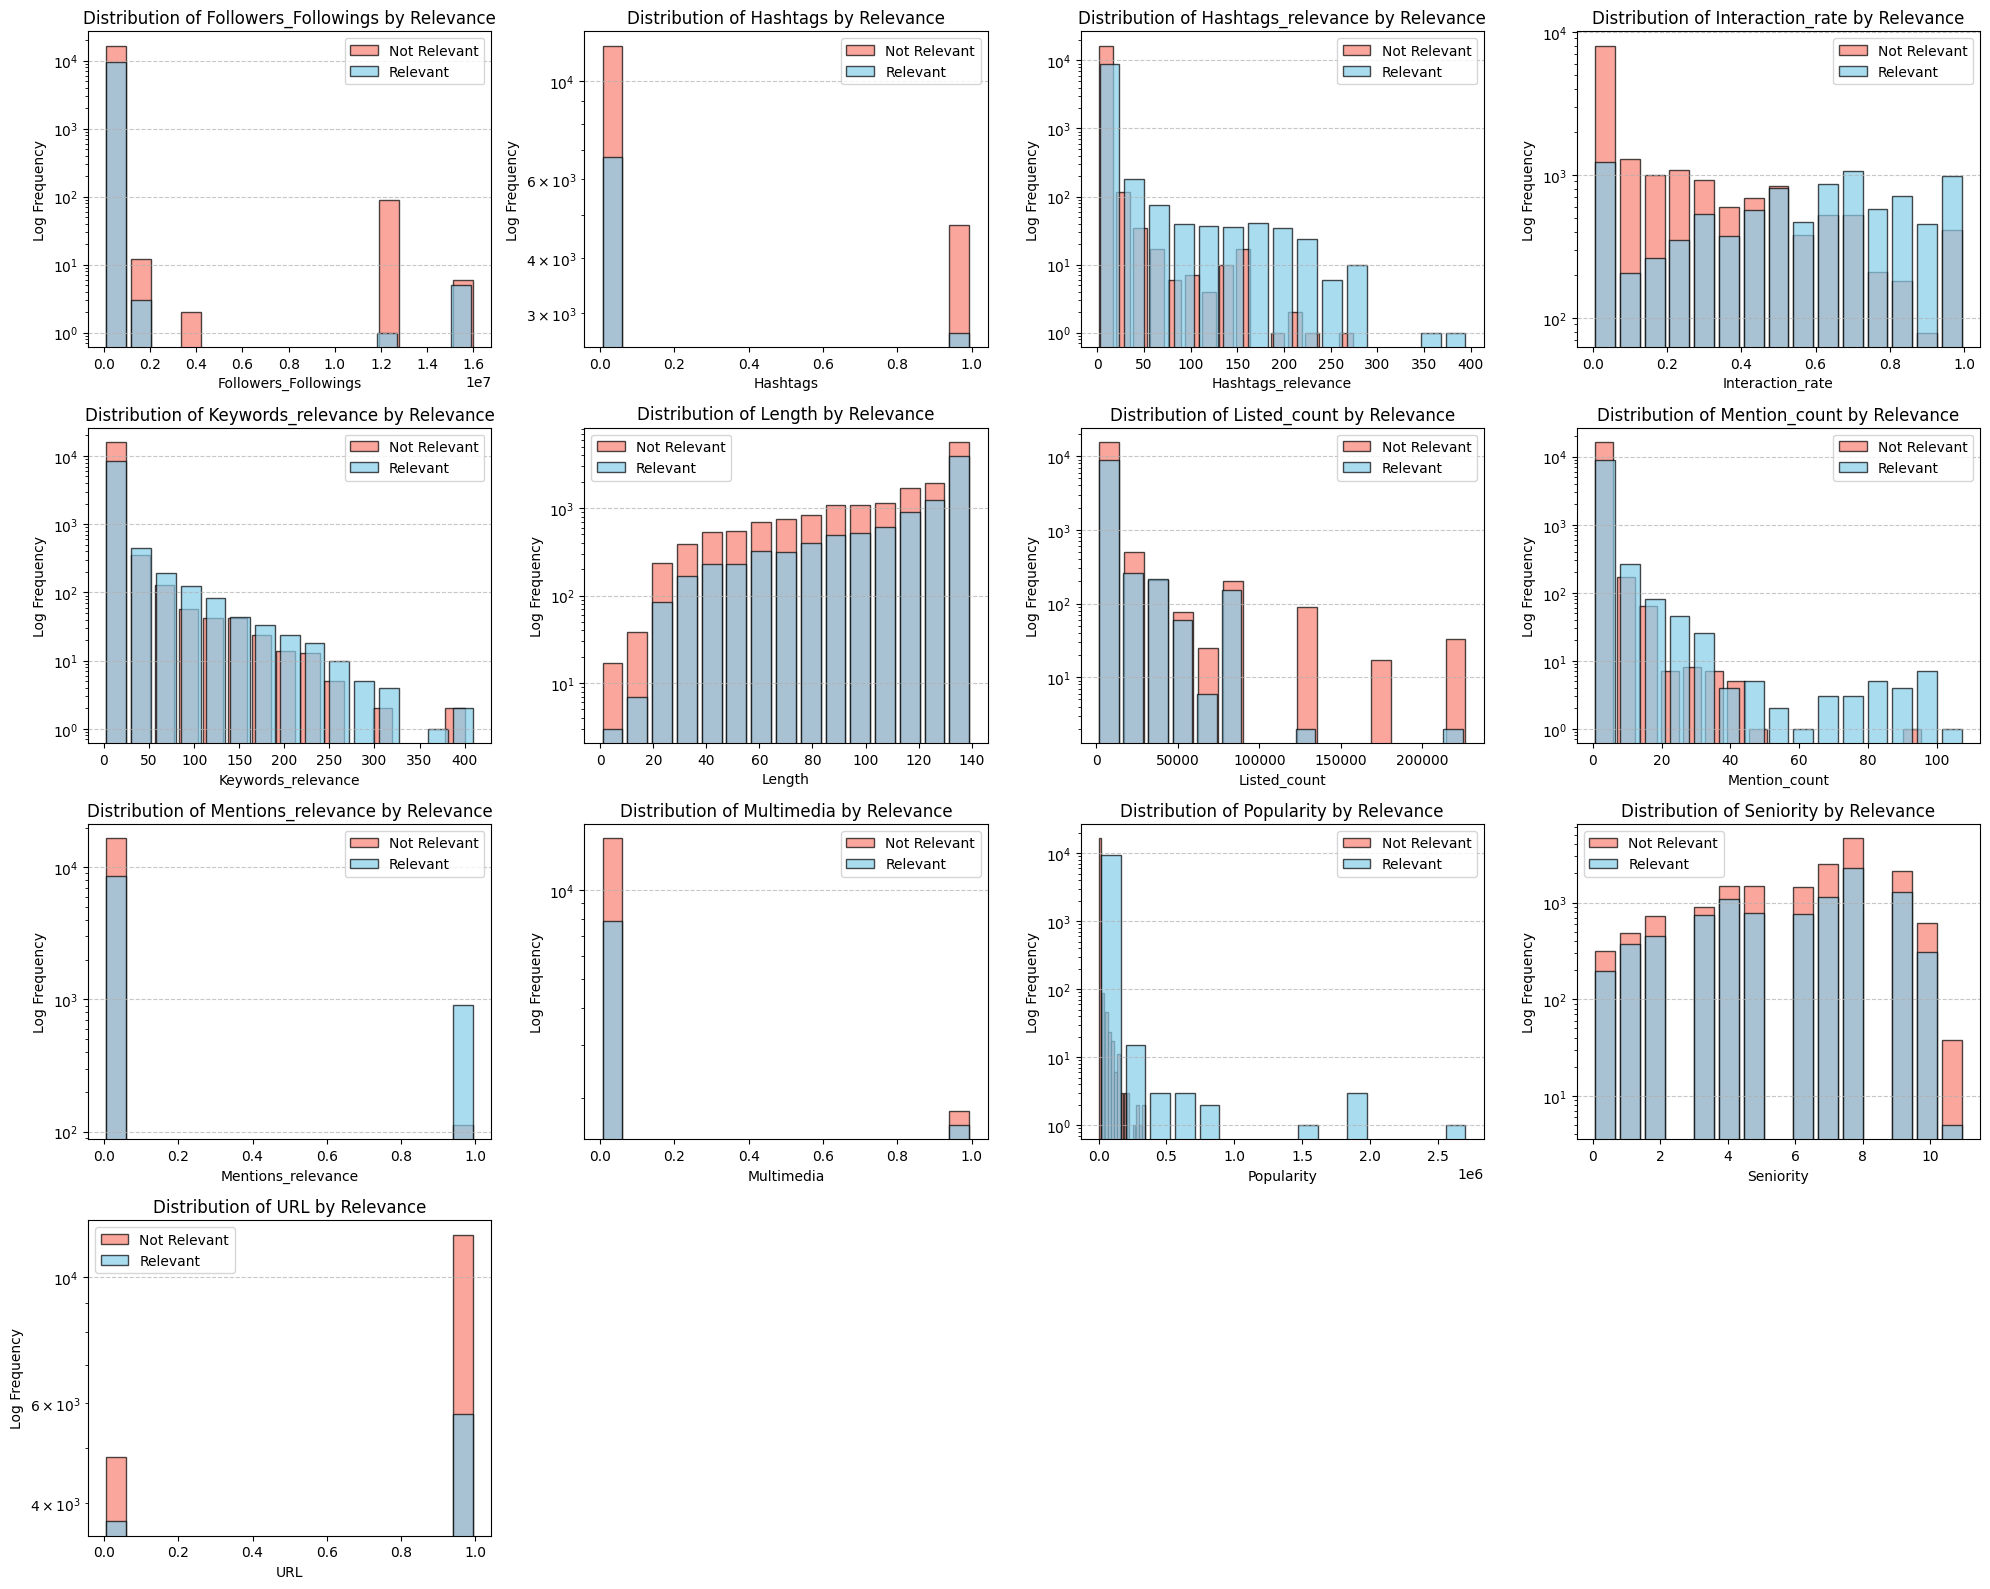

In [12]:
plt.figure(figsize=(20, 16))

for i, feature in enumerate(features, 1):
    plt.subplot(4, 4, i)
    
    plt.hist(df[df['Relevance'] == 0][feature], bins=15, color='salmon', edgecolor='black', alpha=0.7, label='Not Relevant', rwidth=0.8, log=True)
    
    plt.hist(df[df['Relevance'] == 1][feature], bins=15, color='skyblue', edgecolor='black', alpha=0.7, label='Relevant', rwidth=0.8, log=True)
    
    plt.title(f'Distribution of {feature} by Relevance')
    plt.xlabel(feature)
    plt.ylabel('Log Frequency')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Correlation of the features

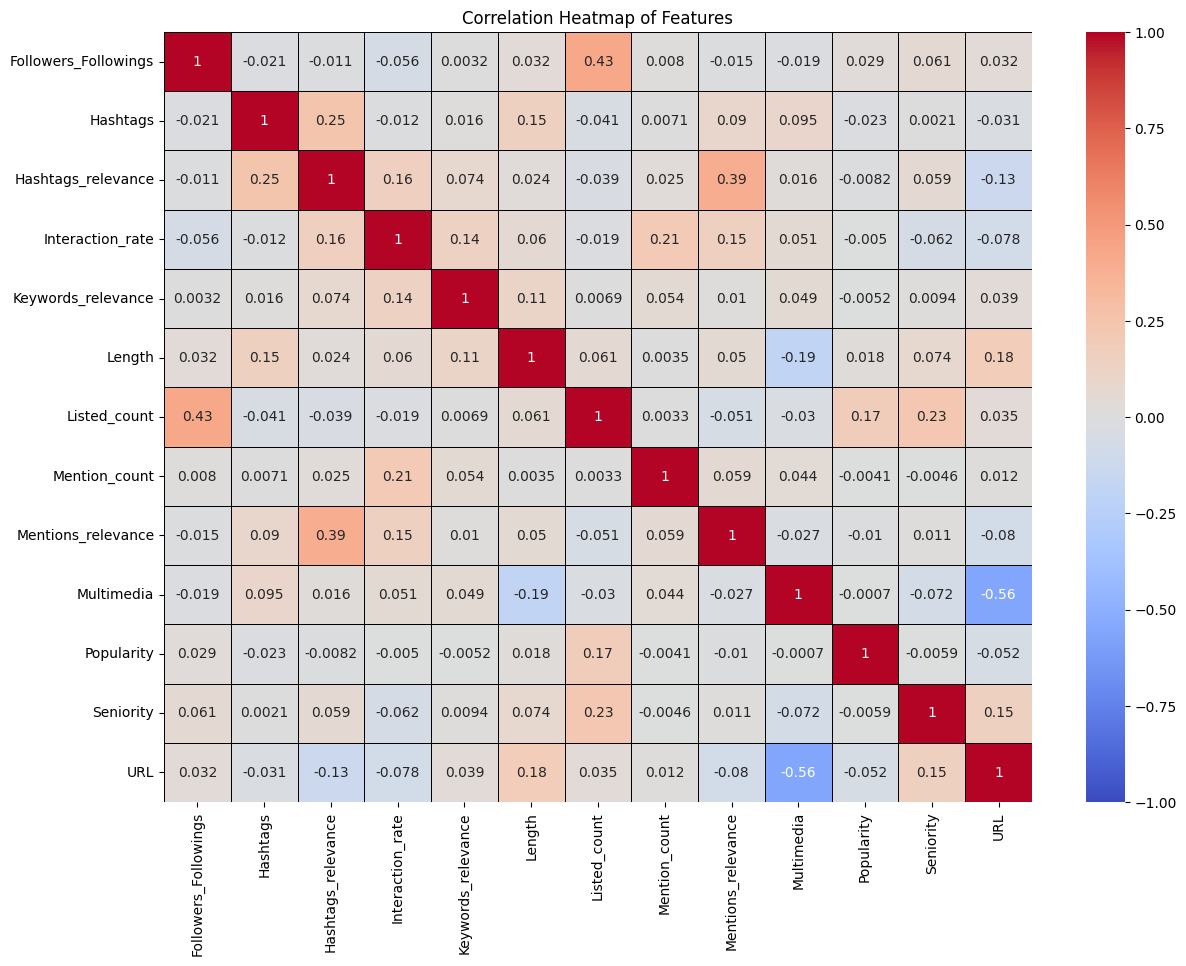

In [13]:
import seaborn as sns

correlation_matrix = df[features].corr()

# heatmap of correlations
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='black')
plt.title('Correlation Heatmap of Features')
plt.show()

#### Pair plots

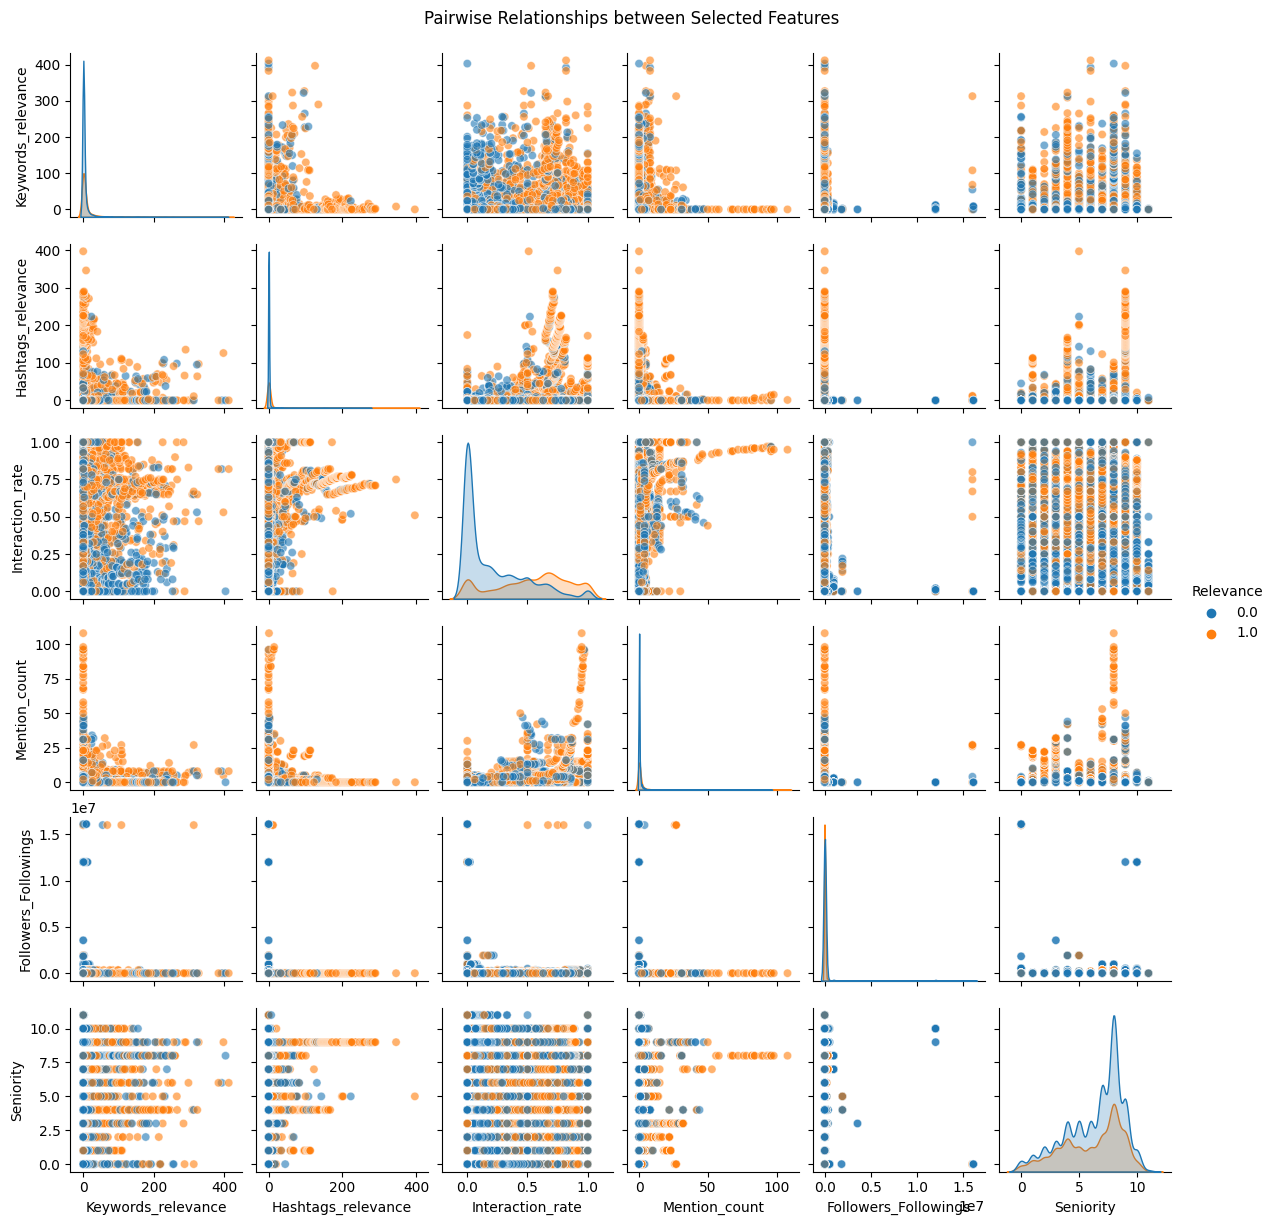

In [14]:
paired_features = ['Keywords_relevance', 'Hashtags_relevance', 'Interaction_rate', 'Mention_count', 'Followers_Followings', 'Seniority']

sns.pairplot(df[paired_features + ['Relevance']], hue='Relevance', plot_kws={'alpha': 0.6}, height=2)
plt.suptitle('Pairwise Relationships between Selected Features', y=1.02)
plt.show()


#### Outliers

In [15]:
def detect_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((data < lower_bound) | (data > upper_bound)).sum()

outliers_count = df[features].apply(detect_outliers)
outliers_count


Followers_Followings    5223
Hashtags                   0
Hashtags_relevance      2974
Interaction_rate           0
Keywords_relevance      4249
Length                    46
Listed_count            4133
Mention_count           5106
Mentions_relevance      1028
Multimedia              3420
Popularity              4466
Seniority                  0
URL                        0
dtype: int64

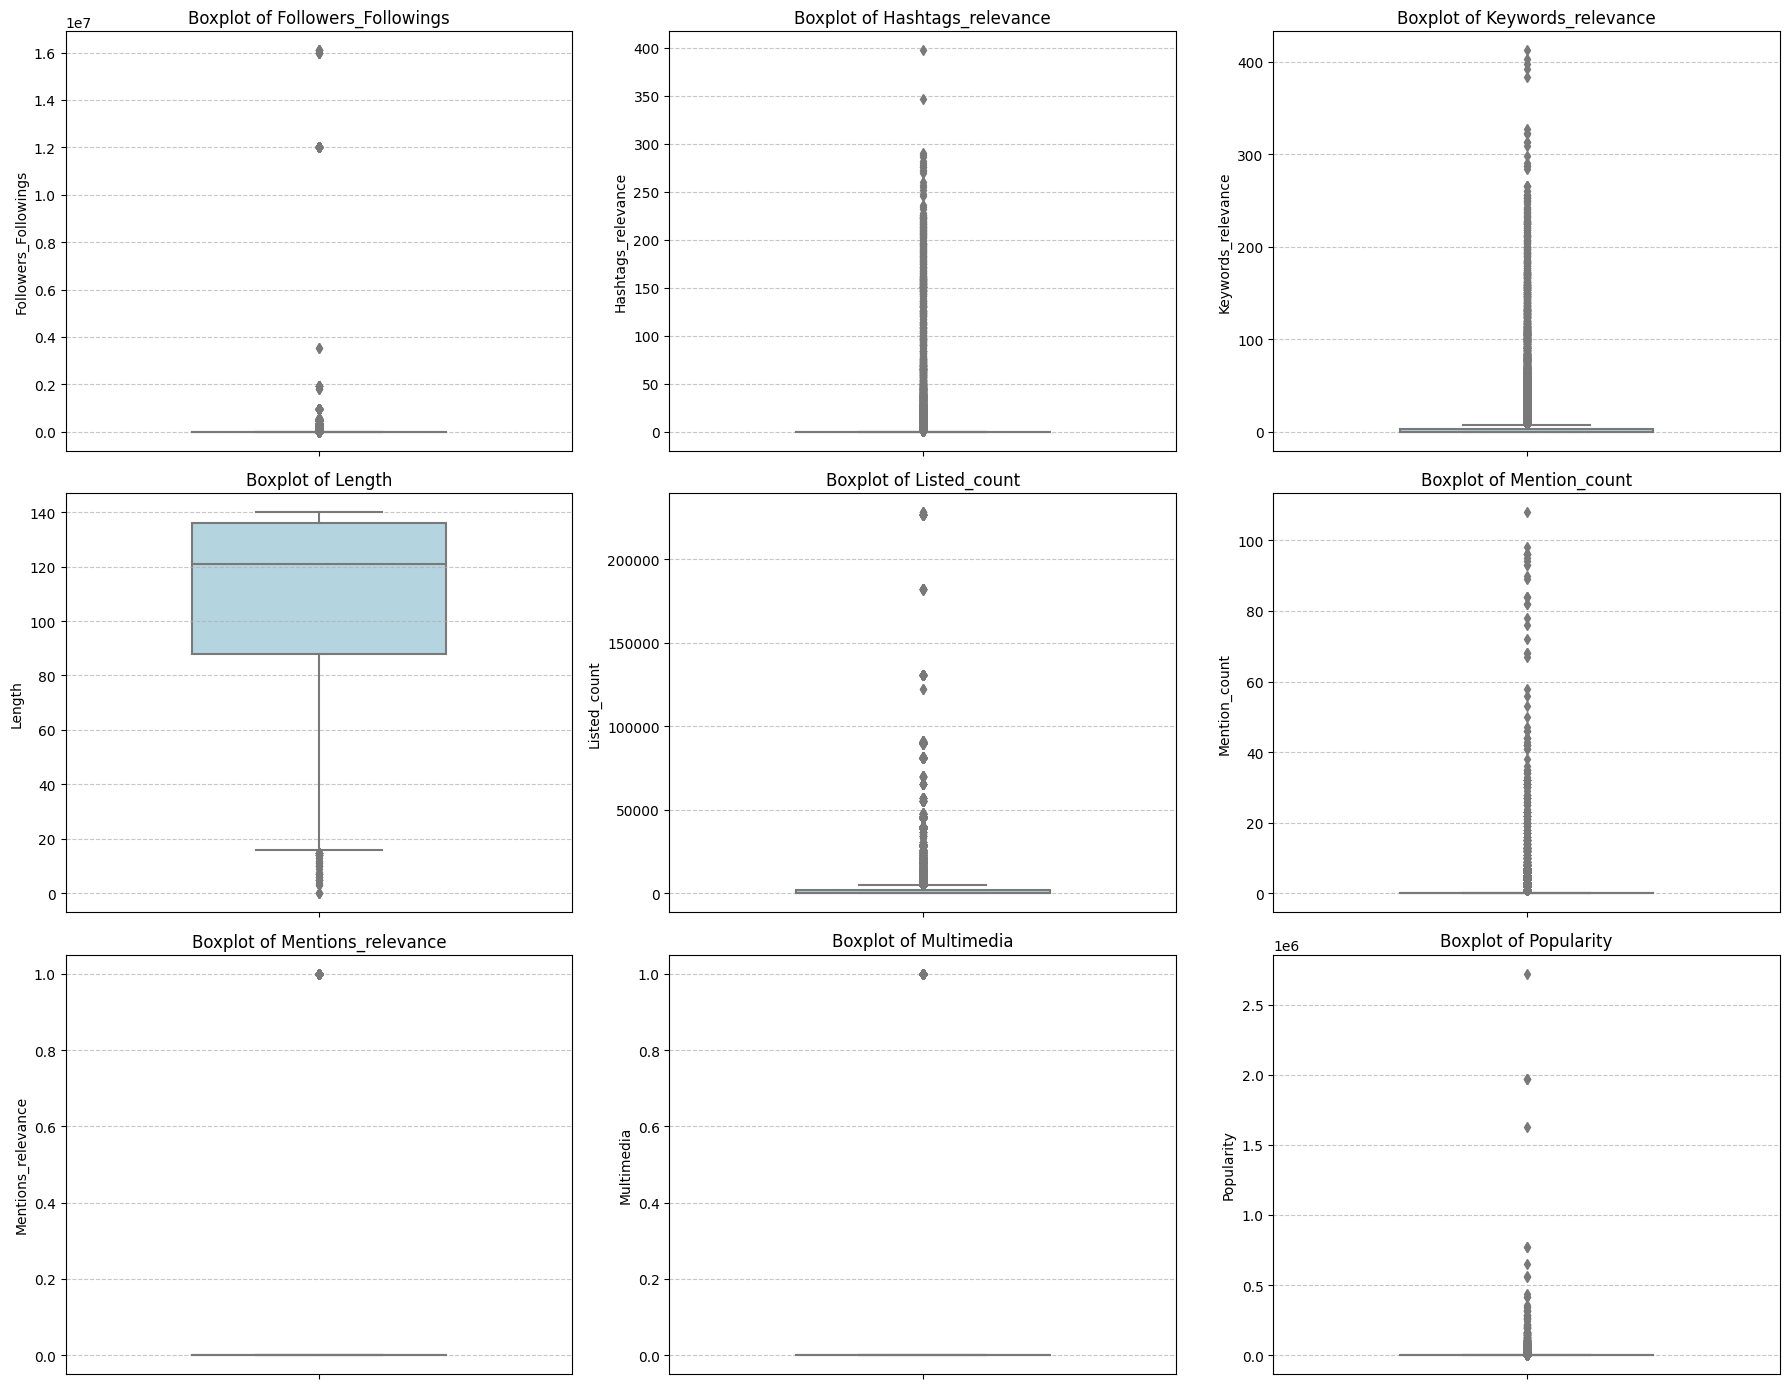

In [16]:
features_with_outliers = outliers_count[outliers_count > 0].index

plt.figure(figsize=(18, 14))
for i, feature in enumerate(features_with_outliers, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[feature], color='lightblue', width=0.5)
    plt.title(f'Boxplot of {feature}')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#### Relation of categorical variables

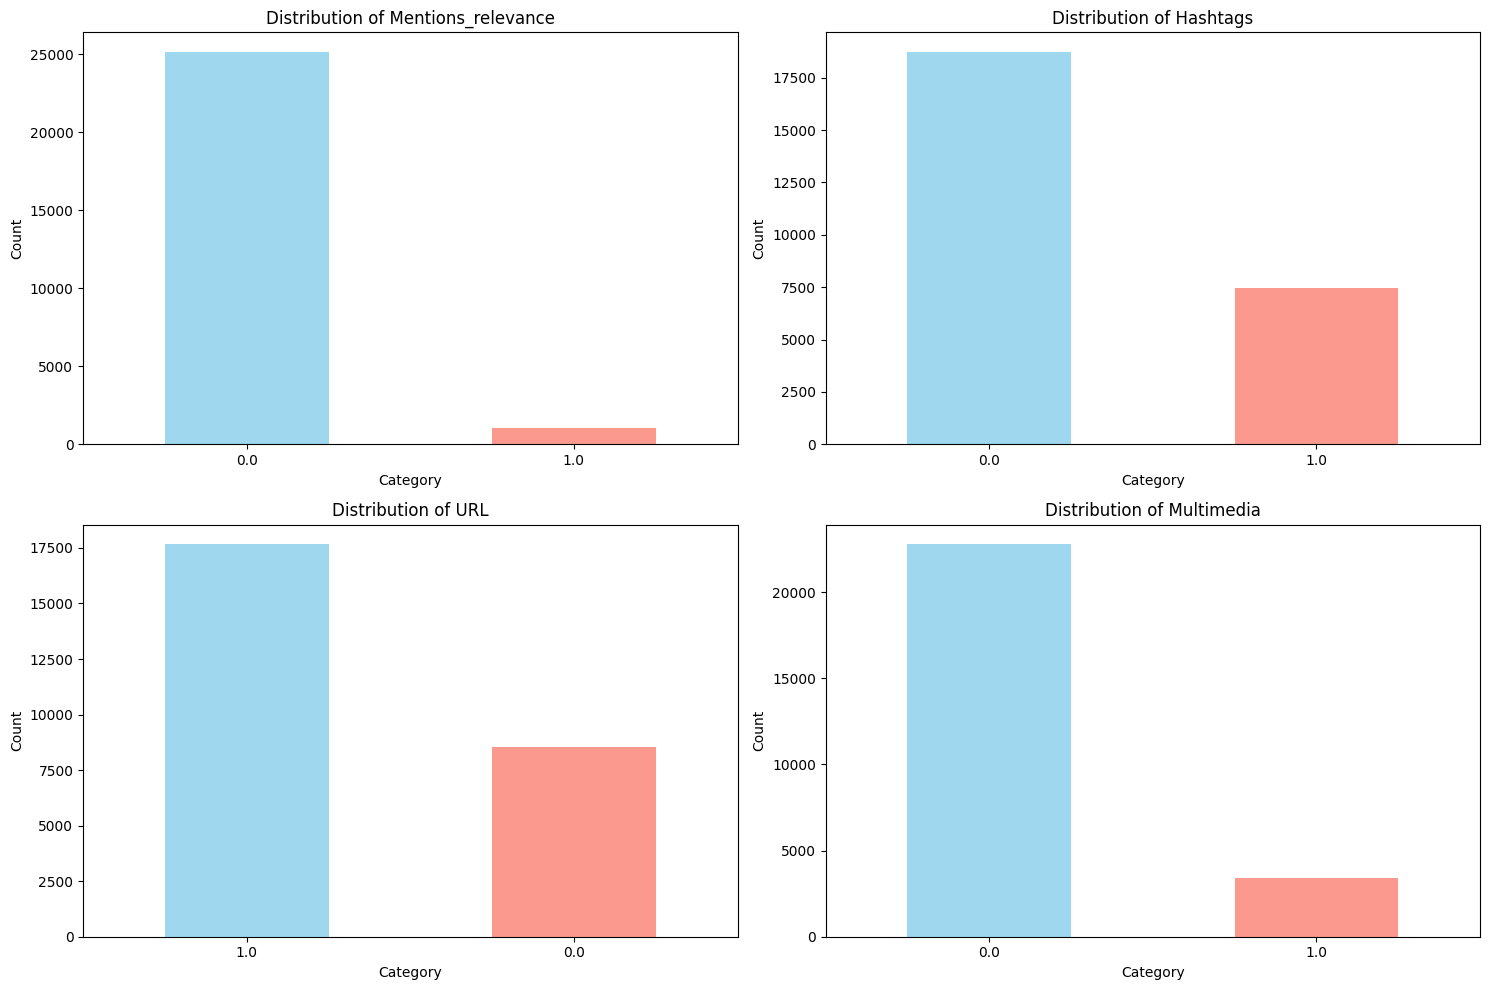

In [17]:
categorical_f = ['Mentions_relevance', 'Hashtags', 'URL', 'Multimedia']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_f, 1):
    plt.subplot(2, 2, i)
    df[feature].value_counts().plot(kind='bar', color=['skyblue', 'salmon'], alpha=0.8)
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

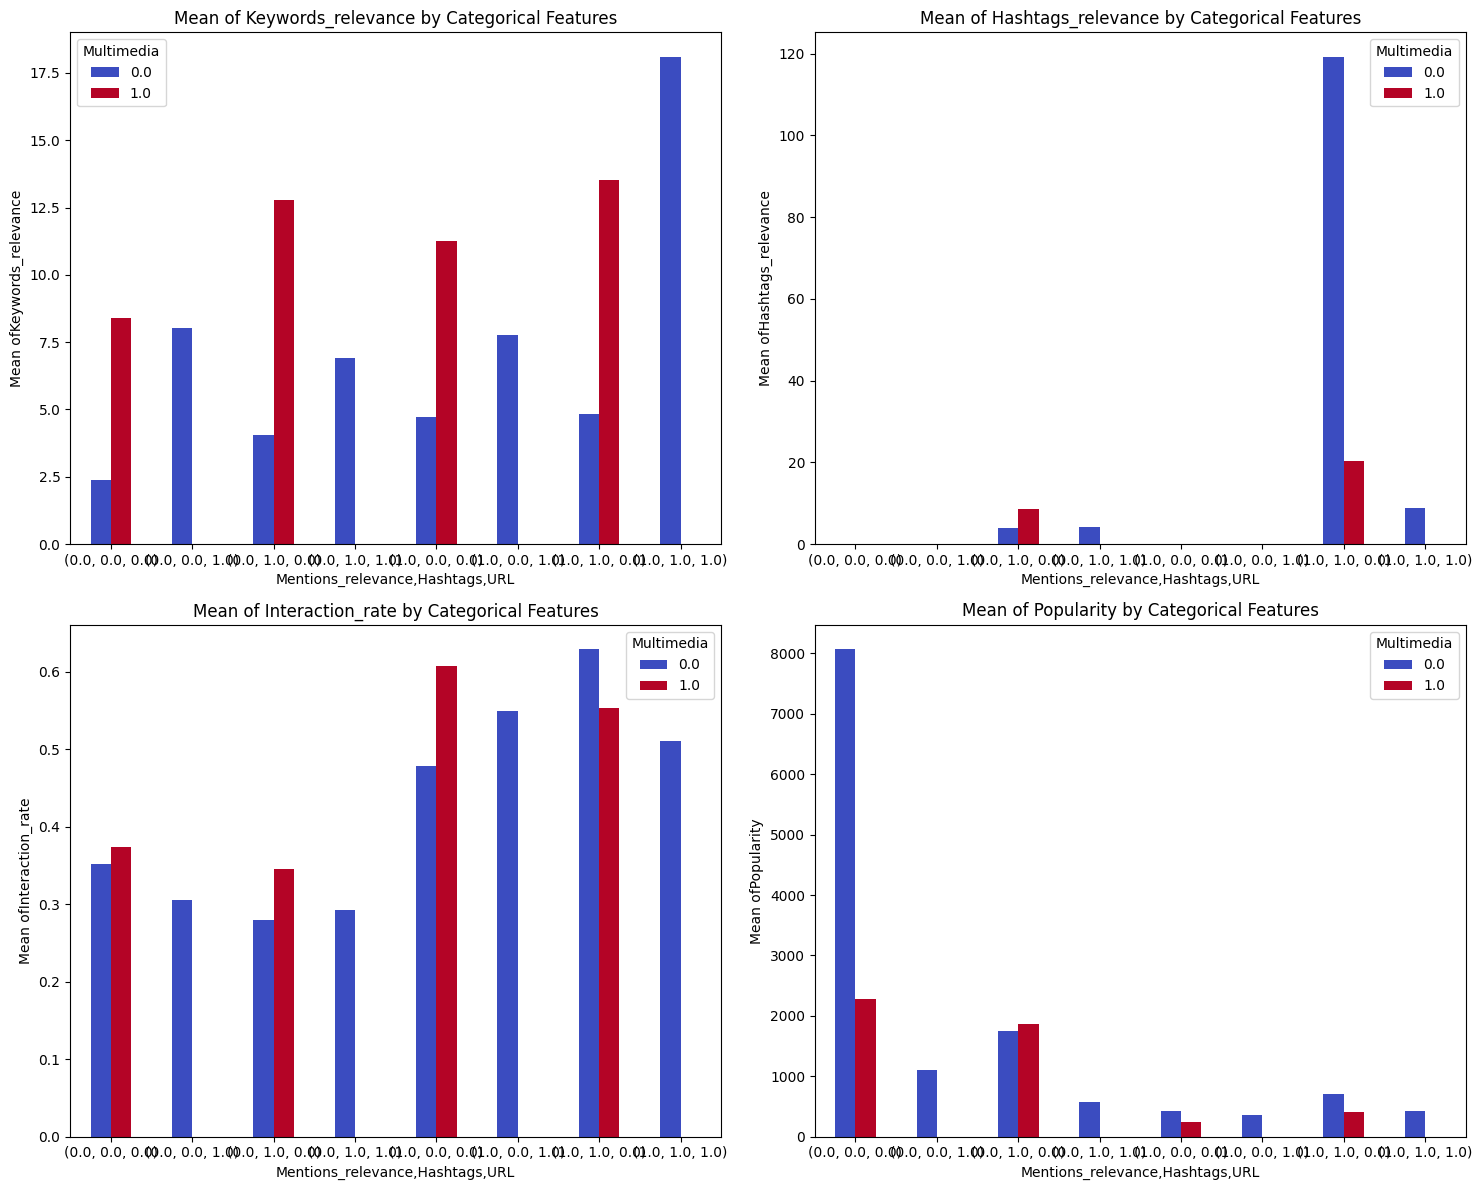

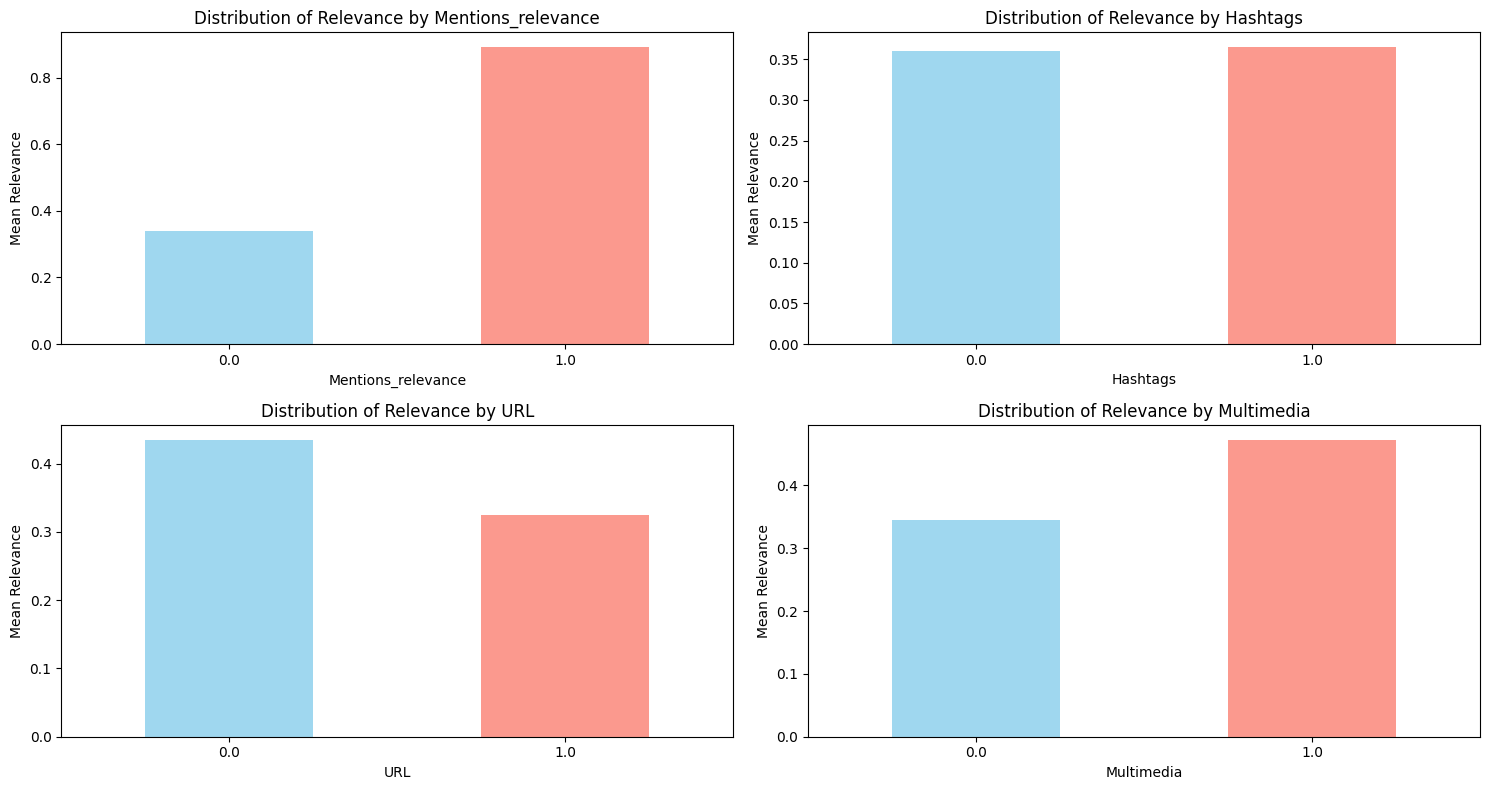

In [18]:
numerical_f = ['Keywords_relevance', 'Hashtags_relevance', 'Interaction_rate', 'Popularity']

plt.figure(figsize=(15, 12))
for i, num_feature in enumerate(numerical_f, 1):
    plt.subplot(2, 2, i)
    df.groupby(categorical_f)[num_feature].mean().unstack().plot(kind='bar', ax=plt.gca(), colormap='coolwarm')
    plt.title(f'Mean of {num_feature} by Categorical Features')
    plt.ylabel(f'Mean of{num_feature}')
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# Visualizing the distribution of the target variable for each category of the categorical features
plt.figure(figsize=(15, 8))
for i, category_feature in enumerate(categorical_f, 1):
    plt.subplot(2, 2, i)
    df.groupby(category_feature)['Relevance'].mean().plot(kind='bar', color=['skyblue', 'salmon'], alpha=0.8)
    plt.title(f'Distribution of Relevance by {category_feature}')
    plt.ylabel('Mean Relevance')
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


### Creating new features

In [20]:
from scipy.stats import f_oneway

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numerical_columns = numerical_columns.drop('Relevance')

anova_results = {}
for column in numerical_columns:
    grouped_data = df[[column, 'Relevance']].dropna().groupby('Relevance')
    f_val, p_val = f_oneway(*[group['Relevance'] for name, group in grouped_data])
    anova_results[column] = p_val

anova_df = pd.DataFrame.from_dict(anova_results, orient='index', columns=['p_value']).sort_values(by='p_value')

anova_df

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
 

,p_value
Keywords_relevance,0.0
Hashtags_relevance,0.0
Mentions_relevance,0.0
Interaction_rate,0.0
Mention_count,0.0
Followers_Followings,0.0
Seniority,0.0
Listed_count,0.0
Length,0.0
Hashtags,0.0


In [21]:
from sklearn.feature_selection import mutual_info_classif

X = df.drop('Relevance', axis=1)
y = df['Relevance']

mutual_info_scores = mutual_info_classif(X, y, discrete_features=False)

mi_df = pd.DataFrame(mutual_info_scores, index=X.columns, columns=['Mutual Information']).sort_values(by='Mutual Information', ascending=False)

mi_df

,Mutual Information
Listed_count,0.144056
Interaction_rate,0.131203
Followers_Followings,0.081252
Popularity,0.051415
Mentions_relevance,0.023207
Mention_count,0.016550
Keywords_relevance,0.012654
Hashtags_relevance,0.011237
Multimedia,0.005176
URL,0.004715


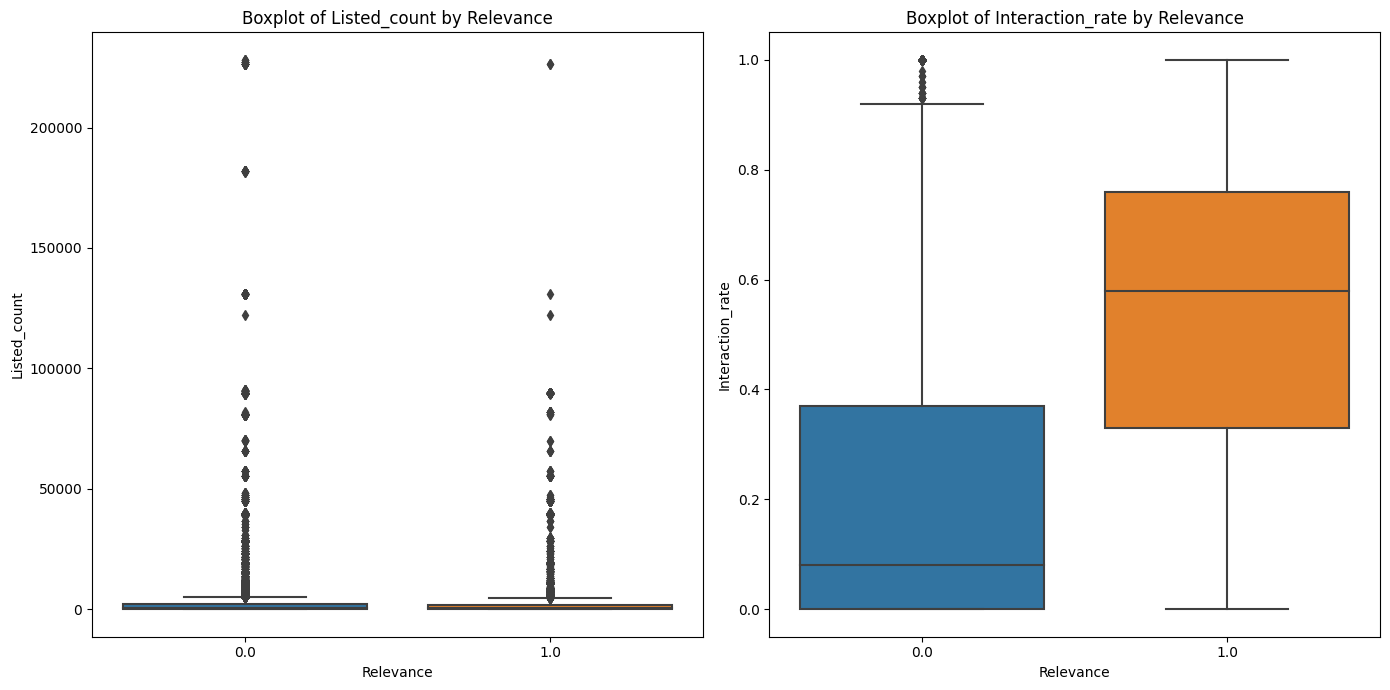

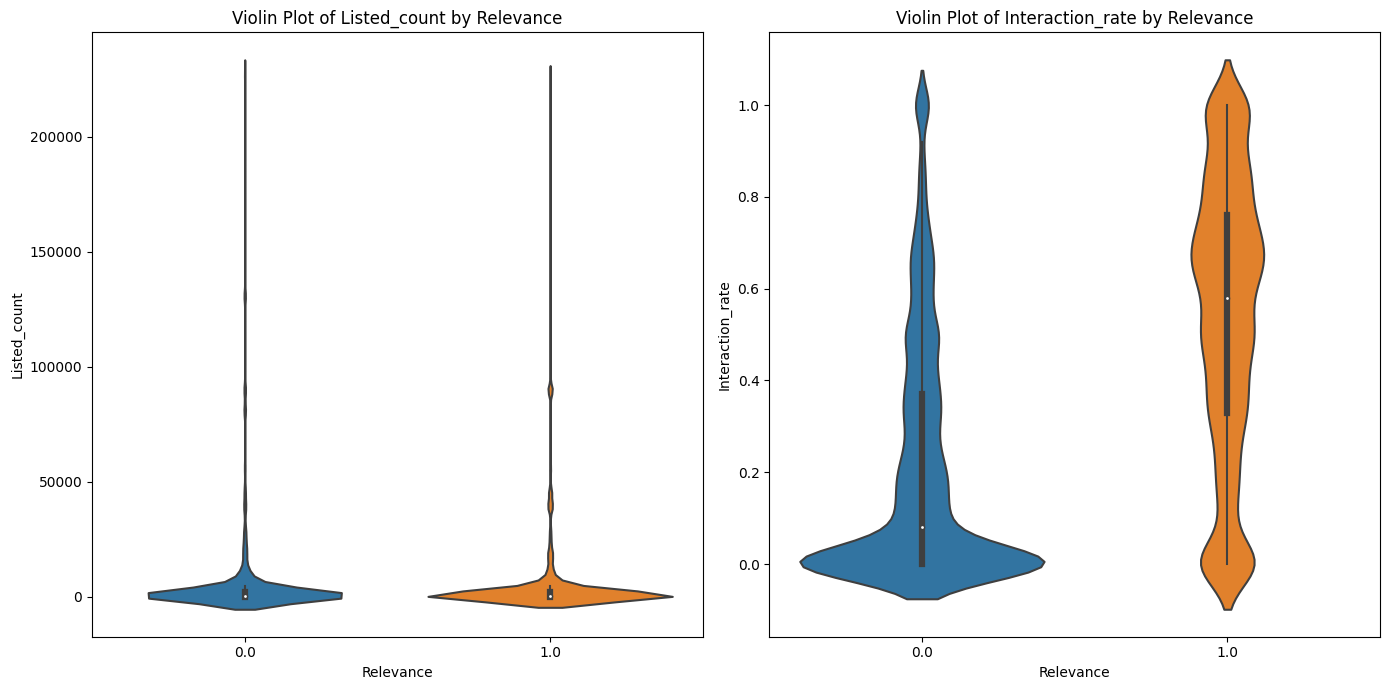

In [22]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.boxplot(x='Relevance', y='Listed_count', data=df)
plt.title('Boxplot of Listed_count by Relevance')

plt.subplot(1, 2, 2)
sns.boxplot(x='Relevance', y='Interaction_rate', data=df)
plt.title('Boxplot of Interaction_rate by Relevance')

plt.tight_layout()
plt.show()
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.violinplot(x='Relevance', y='Listed_count', data=df)
plt.title('Violin Plot of Listed_count by Relevance')
plt.subplot(1, 2, 2)
sns.violinplot(x='Relevance', y='Interaction_rate', data=df)
plt.title('Violin Plot of Interaction_rate by Relevance')

plt.tight_layout()
plt.show()


In [23]:
summary_stats = df.groupby('Relevance')[['Listed_count', 'Interaction_rate']].agg(['mean', 'median', 'std'])

summary_stats

Listed_count                      Interaction_rate                 
                  mean median           std             mean median       std
Relevance                                                                    
0.0        5188.634380  457.0  18678.277553         0.208465   0.08  0.264469
1.0        4537.048757  341.0  14050.607749         0.534801   0.58  0.307218

In [24]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

feature_df = df[['Listed_count', 'Interaction_rate']].copy()
poly = PolynomialFeatures(degree=2, include_bias=False)
interaction_poly = poly.fit_transform(df[['Interaction_rate']])
feature_df = pd.concat([feature_df, pd.DataFrame(interaction_poly, columns=poly.get_feature_names_out())], axis=1)

feature_df['listed_interaction'] = df['Listed_count'] * df['Interaction_rate']

scaler = StandardScaler()
feature_df_scaled = pd.DataFrame(scaler.fit_transform(feature_df), columns=feature_df.columns)

feature_df_scaled.head()

,Listed_count,Interaction_rate,Interaction_rate,Interaction_rate^2,listed_interaction
0,-0.271269,-1.015135,-1.015135,-0.743176,-0.218206
1,-0.277390,-1.015135,-1.015135,-0.743176,-0.218206
2,-0.277390,2.095702,2.095702,2.798784,-0.190051
3,-0.018731,-1.015135,-1.015135,-0.743176,-0.218206
4,-0.287125,-1.015135,-1.015135,-0.743176,-0.218206


In [25]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

X = pd.concat([df.drop(['Relevance'], axis=1), feature_df_scaled], axis=1)
y = df['Relevance']

rf_classifier = RandomForestClassifier(n_jobs=-1, random_state=42)

rfecv = RFECV(estimator=rf_classifier, step=1, cv=5, scoring='accuracy', n_jobs=-1)

rfecv.fit(X, y)

selected_features = X.columns[rfecv.support_]
ranking_features = pd.DataFrame({'Feature': X.columns, 'Ranking': rfecv.ranking_}).sort_values(by='Ranking')

selected_features, ranking_features

(Index(['Keywords_relevance', 'Hashtags_relevance', 'Mentions_relevance',
        'Interaction_rate', 'Mention_count', 'Followers_Followings',
        'Seniority', 'Listed_count', 'Length', 'Hashtags', 'URL', 'Multimedia',
        'Popularity', 'Listed_count', 'Interaction_rate', 'Interaction_rate',
        'Interaction_rate^2', 'listed_interaction'],
       dtype='object'),
                  Feature  Ranking
 0     Keywords_relevance        1
 15      Interaction_rate        1
 14      Interaction_rate        1
 13          Listed_count        1
 12            Popularity        1
 11            Multimedia        1
 10                   URL        1
 9               Hashtags        1
 8                 Length        1
 7           Listed_count        1
 6              Seniority        1
 5   Followers_Followings        1
 4          Mention_count        1
 3       Interaction_rate        1
 2     Mentions_relevance        1
 1     Hashtags_relevance        1
 16    Interaction_rate^2  

### Model Building

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
X = df.drop(['Relevance'], axis=1) 
y = df['Relevance']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='linear', random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=['Not Relevant', 'Relevant'])
    results[name] = {
        'accuracy': accuracy,
        'classification_report': report
    }

for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(metrics['classification_report'])
    print("---")

Model: Logistic Regression
Accuracy: 0.7659
              precision    recall  f1-score   support

Not Relevant       0.79      0.87      0.82      3310
    Relevant       0.72      0.60      0.65      1926

    accuracy                           0.77      5236
   macro avg       0.75      0.73      0.74      5236
weighted avg       0.76      0.77      0.76      5236

---
Model: Random Forest
Accuracy: 0.7874
              precision    recall  f1-score   support

Not Relevant       0.82      0.86      0.84      3310
    Relevant       0.73      0.67      0.70      1926

    accuracy                           0.79      5236
   macro avg       0.77      0.76      0.77      5236
weighted avg       0.78      0.79      0.79      5236

---
Model: Gradient Boosting
Accuracy: 0.7897
              precision    recall  f1-score   support

Not Relevant       0.82      0.85      0.84      3310
    Relevant       0.73      0.68      0.70      1926

    accuracy                           0.79      5

In [27]:
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

extended_models = {
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier()
}

extended_results = {}
for name, model in extended_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=['Not Relevant', 'Relevant'])
    extended_results[name] = {
        'accuracy': accuracy,
        'classification_report': report
    }

results.update(extended_results)

results_df = pd.DataFrame(results).transpose()
results_df[['accuracy']]

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


,accuracy
Logistic Regression,0.765852
Random Forest,0.787433
Gradient Boosting,0.789725
SVM,0.76738
XGBoost,0.788388
Naive Bayes,0.689458
KNN,0.740833


In [28]:
from sklearn.model_selection import GridSearchCV
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0]
}

gb_grid_search = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=gb_param_grid,
    scoring='accuracy',
    n_jobs=-1,
    cv=3,  
    verbose=2
)

gb_grid_search.fit(X_train, y_train)

gb_best_params = gb_grid_search.best_params_
gb_best_score = gb_grid_search.best_score_

(gb_best_params, gb_best_score)

Fitting 3 folds for each of 1296 candidates, totalling 3888 fits
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   1.5s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200, subsample=1.0; total time=   2.9s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=100, subsample=0.8; total time=   1.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=100, subsample=0.8; total time=   1.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=100, subsample=0.9; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=200, subsample=0.9; total time=   2.8s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=300, subsample=0.9; total tim

({'learning_rate': 0.05,
  'max_depth': 6,
  'min_samples_leaf': 3,
  'min_samples_split': 2,
  'n_estimators': 300,
  'subsample': 0.9},
 0.7988924132071155)

In [29]:
xgb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'colsample_bytree': [0.7, 1]
}

xgb_grid_search = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid=xgb_param_grid,
    scoring='accuracy',
    n_jobs=-1,
    cv=3,
    verbose=2
)

xgb_grid_search.fit(X_train, y_train)

xgb_best_params = xgb_grid_search.best_params_
xgb_best_score = xgb_grid_search.best_score_

(xgb_best_params,xgb_best_score)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Fitting 3 folds for each of 36 candidates, totalling 108 fits


({'colsample_bytree': 1,
  'learning_rate': 0.1,
  'max_depth': 5,
  'n_estimators': 200},
 0.7964572935503772)

In [30]:
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

rf_grid_search.fit(X_train, y_train)

rf_best_params = rf_grid_search.best_params_
rf_best_score = rf_grid_search.best_score_

(rf_best_params,rf_best_score)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=200, subsample=1.0; total time=   3.9s
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=300, subsample=1.0; total time=   5.9s
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=200, subsample=0.9; total time=   3.6s
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=300, subsample=1.0; total time=   5.8s
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=200, subsample=0.8; total time=   3.6s
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=300, subsample=0.9; total time=   5.6s
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   1.9s

({'bootstrap': False,
  'max_depth': 30,
  'min_samples_leaf': 4,
  'min_samples_split': 2,
  'n_estimators': 200},
 0.7967437991346237)

In [32]:
gb_model = GradientBoostingClassifier(
    learning_rate=0.05,
    max_depth=6,
    min_samples_leaf=3,
    min_samples_split=2,
    n_estimators=300,
    subsample = 0.9,
    random_state=42
)
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_y_pred)
gb_report_df = pd.DataFrame(classification_report(y_test, gb_y_pred, target_names=['Not Relevant', 'Relevant'], output_dict=True))

xgb_model = XGBClassifier(
    colsample_bytree=1,
    learning_rate=0.1,
    max_depth=5,
    n_estimators=200,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_report_df = pd.DataFrame(classification_report(y_test, xgb_y_pred, target_names=['Not Relevant', 'Relevant'], output_dict=True))

rf_model = RandomForestClassifier(
    bootstrap=True,
    max_depth=20,
    min_samples_leaf=1,
    min_samples_split=10,
    n_estimators=200,
    random_state=42
)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_report_df = pd.DataFrame(classification_report(y_test, rf_y_pred, target_names=['Not Relevant', 'Relevant'], output_dict=True))

final_model_results_df = {
    'Gradient Boosting': {'accuracy': gb_accuracy, 'report_df': gb_report_df},
    'XGBoost': {'accuracy': xgb_accuracy, 'report_df': xgb_report_df},
    'Random Forest': {'accuracy': rf_accuracy, 'report_df': rf_report_df}
}

final_model_results_df['Gradient Boosting']['report_df'], final_model_results_df['XGBoost']['report_df'], final_model_results_df['Random Forest']['report_df']

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


(           Not Relevant     Relevant  accuracy    macro avg  weighted avg
 precision      0.821460     0.730106  0.790107     0.775783      0.787856
 recall         0.853474     0.681205  0.790107     0.767339      0.790107
 f1-score       0.837161     0.704808  0.790107     0.770985      0.788477
 support     3310.000000  1926.000000  0.790107  5236.000000   5236.000000,
            Not Relevant     Relevant  accuracy    macro avg  weighted avg
 precision      0.819525     0.730381  0.789152     0.774953      0.786734
 recall         0.854683     0.676532  0.789152     0.765607      0.789152
 f1-score       0.836735     0.702426  0.789152     0.769580      0.787331
 support     3310.000000  1926.000000  0.789152  5236.000000   5236.000000,
            Not Relevant     Relevant  accuracy    macro avg  weighted avg
 precision      0.819070     0.738883  0.792208     0.778976      0.789574
 recall         0.861631     0.672897  0.792208     0.767264      0.792208
 f1-score       0.83981

In [34]:
importances = rf_model.feature_importances_
try:
    feature_names = df.columns[:-1] 
except NameError:
    feature_names = ['User_followers_count', 'User_following_count', 'User_listed_count', 'User_statuses_count',
                     'User_favourites_count', 'User_verified', 'User_account_age', 'Tweet_hour', 'Tweet_number_of_hashtags',
                     'Tweet_number_of_urls', 'Tweet_number_of_mentions', 'Tweet_sentiment', 'Interaction_rate']

feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

feature_importance_df

,feature,importance
3,Interaction_rate,0.314724
12,Popularity,0.180402
7,Listed_count,0.104633
8,Length,0.078057
5,Followers_Followings,0.076933
0,Keywords_relevance,0.057583
2,Mentions_relevance,0.049649
6,Seniority,0.044578
4,Mention_count,0.033312
1,Hashtags_relevance,0.028480


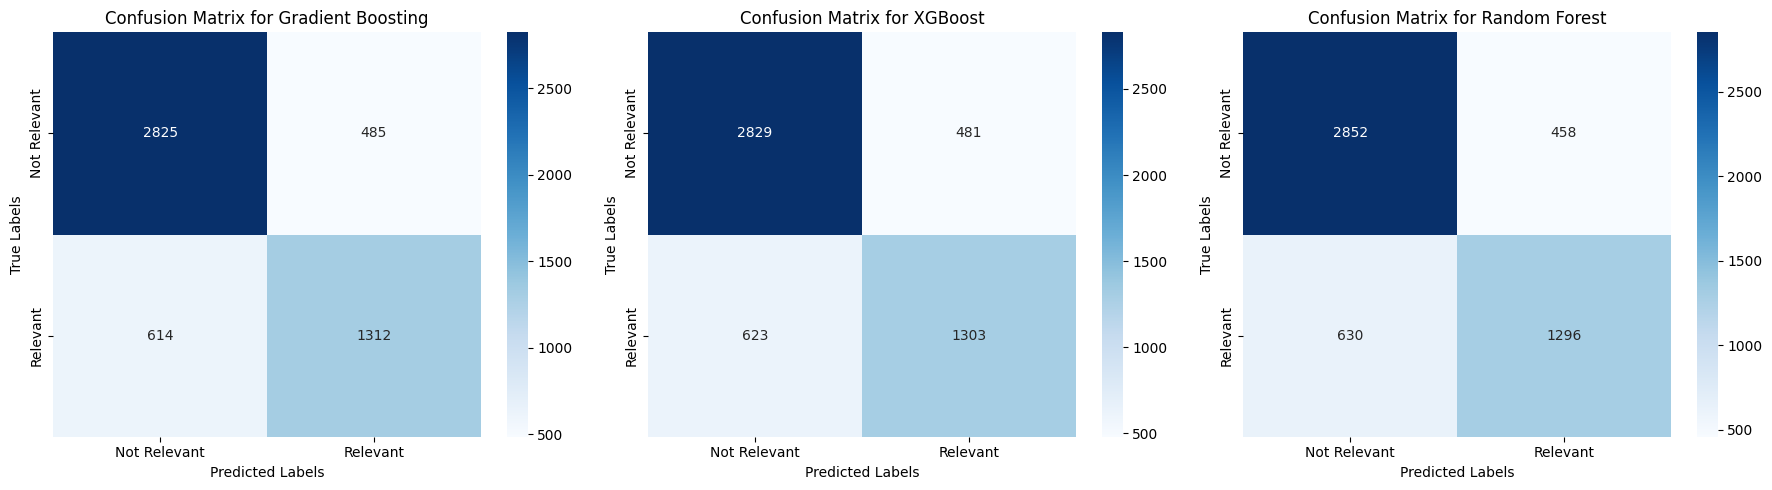

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

gb_cm = confusion_matrix(y_test, gb_y_pred)
xgb_cm = confusion_matrix(y_test, xgb_y_pred)
rf_cm = confusion_matrix(y_test, rf_y_pred)


def plot_confusion_matrix(cm, model_name, ax):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'Confusion Matrix for {model_name}')
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    ax.xaxis.set_ticklabels(['Not Relevant', 'Relevant'])
    ax.yaxis.set_ticklabels(['Not Relevant', 'Relevant'])


fig, axes = plt.subplots(1, 3, figsize=(18, 5))

plot_confusion_matrix(gb_cm, 'Gradient Boosting', axes[0])
plot_confusion_matrix(xgb_cm, 'XGBoost', axes[1])
plot_confusion_matrix(rf_cm, 'Random Forest', axes[2])

plt.tight_layout()
plt.show()

In [43]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

strat_k_fold = StratifiedKFold(n_splits=5)

gb_cv_scores = cross_val_score(gb_model, X, y, cv=strat_k_fold, scoring='accuracy')
xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=strat_k_fold, scoring='accuracy')
rf_cv_scores = cross_val_score(rf_model, X, y, cv=strat_k_fold, scoring='accuracy')

cv_scores_df = pd.DataFrame({
    'Gradient Boosting': gb_cv_scores,
    'XGBoost': xgb_cv_scores,
    'Random Forest': rf_cv_scores
})

cv_scores_df

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:1

,Gradient Boosting,XGBoost,Random Forest
0,0.758976,0.770435,0.762796
1,0.769481,0.771581,0.767953
2,0.776929,0.783231,0.775974
3,0.754775,0.760504,0.754584
4,0.781322,0.787624,0.788006


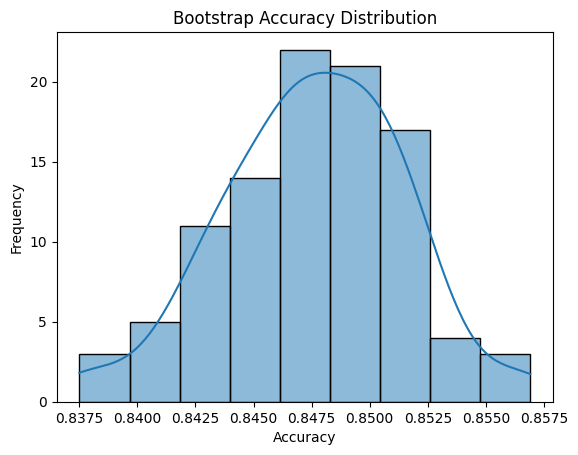

95.0% confidence interval 0.839 and 0.855


In [44]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
import numpy as np
def bootstrap_validation(model, X, y, n_iterations=100, size=0.5):
    stats = list()
    for i in range(n_iterations):
        X_train, y_train = resample(X, y, n_samples=int(len(X) * size))
        X_test, y_test = resample(X, y, n_samples=int(len(X) * (1 - size)))
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        score = accuracy_score(y_test, predictions)
        stats.append(score)
    return stats
rf_bootstrap_scores = bootstrap_validation(rf_model, X, y)

sns.histplot(rf_bootstrap_scores, kde=True)
plt.title('Bootstrap Accuracy Distribution')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.show()

alpha = 0.95
lower_p = ((1.0 - alpha) / 2.0) * 100
upper_p = (alpha + ((1.0 - alpha) / 2.0)) * 100
lower = max(0.0, np.percentile(rf_bootstrap_scores, lower_p))
upper = min(1.0, np.percentile(rf_bootstrap_scores, upper_p))
print(f"{alpha*100:.1f}% confidence interval {lower:.3f} and {upper:.3f}")

In [45]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

base_models = [
    ('rf', rf_model),
    ('gb', gb_model),
    ('xgb', xgb_model)
]

meta_model = LogisticRegression()

stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

stacking_model.fit(X_train, y_train)

stack_pred = stacking_model.predict(X_test)
stack_accuracy = accuracy_score(y_test, stack_pred)

stack_accuracy

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


0.7925897631779985